### Author: Hoang Chu

### Imports

In [80]:
%pip install -r dependencies.txt

Note: you may need to restart the kernel to use updated packages.


In [81]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import requests
import scipy
import importlib
import helper, consts
importlib.reload(consts)
importlib.reload(helper)

<module 'helper' from '/Users/hoangchu/Documents/Clinic/code/helper.py'>

### CONSTANTS

In [82]:
ROW = consts.ROW
COL = consts.COL
RAW_DATA_PATH = consts.RAW_DATA_PATH
RESPONSE_NAME = consts.RESPONSE_NAME

### Quick Functions

In [83]:
does_sub_df_has_Nan = lambda df, col_name: df[[col_name]].isna().any(axis=COL)

### Read data

In [84]:
# local read

data_20191202_1200_df = pd.read_csv(RAW_DATA_PATH + "data_20191202_1200.csv")
data_20191203_1200_df = pd.read_csv(RAW_DATA_PATH + "data_20191203_1200.csv")

### Feature Selection

##### Preliminary check

In [85]:
data_20191202_1200_df.shape

(2910, 252)

In [86]:
data_20191203_1200_df.shape

(2915, 252)

In [87]:
print(f"20191202:")
data_20191202_1200_df.info()
print(f"Columns with NaN: {data_20191202_1200_df[data_20191202_1200_df.isna().any(axis=COL)]}")

print()

print(f"20191203:")
data_20191203_1200_df.info()
print(f"Columns with NaN: {data_20191203_1200_df[data_20191203_1200_df.isna().any(axis=COL)]}")

20191202:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2910 entries, 0 to 2909
Columns: 252 entries, eqid to tr_toxhr_0
dtypes: float64(251), int64(1)
memory usage: 5.6 MB
Columns with NaN: Empty DataFrame
Columns: [eqid, wt, today, tonight, tmwam, dn3sttmwmd, dn1, dn4x1, cftorrrelstd_open_0, liqlog_open_0, llirpnxm_am_1, llirpnxm_dy_12to16, llirpnxm_dy_17to21, llirpnxm_dy_1to3, llirpnxm_dy_4to6, llirpnxm_dy_7to11, llirpnxm_lst15_0, llirpnxm_lsthrx15_0, llirpnxm_md_1, llirpnxm_nt_0, llirpnxm_nt_1, llirpnxm_nt_12to16, llirpnxm_nt_17to21, llirpnxm_nt_1to3, llirpnxm_nt_4to6, llirpnxm_nt_7to11, llirpnxm_pm_1, llirpnxm_toxhr_0, mocrelvol_open_1, mocrelvol_open_13to17, mocrelvol_open_18to22, mocrelvol_open_2to4, mocrelvol_open_5to7, mocrelvol_open_8to12, momr10d_open_0, momr50dx10d_open_0, moorelvol_open_0, moorelvol_open_12to16, moorelvol_open_17to21, moorelvol_open_1to3, moorelvol_open_4to6, moorelvol_open_7to11, nnetticksrelmultstdev_am_1, nnetticksrelmultstdev_dy_12to16, nnetticksre

In [88]:
print(f"20191202 - unique eqid count: {data_20191202_1200_df.eqid.nunique()}")
print(f"20191203 - unique eqid count: {data_20191203_1200_df.eqid.nunique()}")

20191202 - unique eqid count: 2910
20191203 - unique eqid count: 2915


In [89]:
data_20191202_1200_df.drop('eqid', axis=COL, inplace=True)
data_20191203_1200_df.drop('eqid', axis=COL, inplace=True)

In [90]:
print(f"20191202:")
data_20191202_1200_df.describe().loc[['min', 'max']]

20191202:


,wt,today,tonight,tmwam,dn3sttmwmd,dn1,dn4x1,cftorrrelstd_open_0,liqlog_open_0,llirpnxm_am_1,...,tr_md_1,tr_nt_0,tr_nt_1,tr_nt_12to16,tr_nt_17to21,tr_nt_1to3,tr_nt_4to6,tr_nt_7to11,tr_pm_1,tr_toxhr_0
min,0.000017,-0.056959,-0.074278,-0.057647,-0.172408,-0.160248,-0.211938,-1.842923,-3.395071,-0.011349,...,-0.024689,-0.101875,-0.041802,-0.224477,-0.253916,-0.248580,-0.182809,-0.226581,0.0,-0.027905
max,0.001446,0.051399,0.064996,0.055767,0.239135,0.099030,0.222372,2.024149,1.571073,0.007322,...,0.064105,0.068691,0.102588,0.254516,0.278915,0.327063,0.174921,0.269118,0.0,0.018218


In [91]:
print(f"20191203:")
data_20191203_1200_df.describe().loc[['min', 'max']]

20191203:


,wt,today,tonight,tmwam,dn3sttmwmd,dn1,dn4x1,cftorrrelstd_open_0,liqlog_open_0,llirpnxm_am_1,...,tr_md_1,tr_nt_0,tr_nt_1,tr_nt_12to16,tr_nt_17to21,tr_nt_1to3,tr_nt_4to6,tr_nt_7to11,tr_pm_1,tr_toxhr_0
min,0.000017,-0.048435,-0.046199,-0.047159,-0.194887,-0.114078,-0.188259,-1.855363,-3.389490,-0.008491,...,-0.112965,-0.23746,-0.101875,-0.226581,-0.253916,-0.248580,-0.203380,-0.194633,-0.036342,-0.070831
max,0.001440,0.046834,0.074337,0.055817,0.259849,0.106556,0.251362,2.036582,1.573204,0.028806,...,0.057098,0.23246,0.068691,0.254516,0.278915,0.327063,0.174921,0.269118,0.076588,0.104314


##### Get the responses columns

In [92]:
training_responses = data_20191202_1200_df[RESPONSE_NAME]
testing_responses = data_20191203_1200_df[RESPONSE_NAME]

##### 20191202_1200 data

In [93]:
data_20191202_1200_df.drop(RESPONSE_NAME, axis=COL, inplace=True)

In [94]:
data_20191202_1200_df.corr().isna().sum()

wt              16
today           16
tonight         16
tmwam           16
dn3sttmwmd      16
              ... 
tr_nt_1to3      16
tr_nt_4to6      16
tr_nt_7to11     16
tr_pm_1        250
tr_toxhr_0      16
Length: 250, dtype: int64

Some column pairs have NaN correlations, meaning either or both columns have constant values in all rows.

In [95]:
# Get columns where all rows have the same value
constVal_columns = data_20191202_1200_df.columns[data_20191202_1200_df.apply(lambda x: x.nunique() == 1)]
constVal_columns

Index(['llirpnxm_pm_1', 'nnetticksrelrrsign_pm_1', 'nsameticksrelrrsign_pm_1',
       'rel2retcfrtxm_pm_1', 'relntrds70tr_pm_1', 'relvol_pm_1',
       'rrirpnxm_pm_1', 'rrretstr_pm_1', 'rvdelta_nt_0', 'rvdelta_nt_1',
       'rvdelta_nt_12to16', 'rvdelta_nt_17to21', 'rvdelta_nt_1to3',
       'rvdelta_nt_4to6', 'rvdelta_nt_7to11', 'tr_pm_1'],
      dtype='object')

In [96]:
TOBE_REMOVED_20191202_1200_COLUMNS = list(constVal_columns)

##### 20191203_1200 data

In [97]:
data_20191203_1200_df.drop(RESPONSE_NAME, axis=COL, inplace=True)

In [98]:
data_20191203_1200_df.corr().isna().sum()

wt             7
today          7
tonight        7
tmwam          7
dn3sttmwmd     7
              ..
tr_nt_1to3     7
tr_nt_4to6     7
tr_nt_7to11    7
tr_pm_1        7
tr_toxhr_0     7
Length: 250, dtype: int64

In [99]:
# Get columns where all rows have the same value
constVal_columns = data_20191203_1200_df.columns[data_20191203_1200_df.apply(lambda x: x.nunique() == 1)]
constVal_columns

Index(['rvdelta_nt_0', 'rvdelta_nt_1', 'rvdelta_nt_12to16',
       'rvdelta_nt_17to21', 'rvdelta_nt_1to3', 'rvdelta_nt_4to6',
       'rvdelta_nt_7to11'],
      dtype='object')

In [100]:
TOBE_REMOVED_20191203_1200_COLUMNS = list(constVal_columns)

##### Get training_predictors_df and testing_predictors_df

In [101]:
TOBE_REMOVED_20191202_1200_COLUMNS_set = set(TOBE_REMOVED_20191202_1200_COLUMNS)
TOBE_REMOVED_20191203_1200_COLUMNS_set = set(TOBE_REMOVED_20191203_1200_COLUMNS)

In [102]:
# Appear in TOBE_REMOVED_20191202_1200_COLUMNS_set but not in TOBE_REMOVED_20191203_1200_COLUMNS_set
print(TOBE_REMOVED_20191202_1200_COLUMNS_set - TOBE_REMOVED_20191203_1200_COLUMNS_set)

{'nnetticksrelrrsign_pm_1', 'rrretstr_pm_1', 'llirpnxm_pm_1', 'rel2retcfrtxm_pm_1', 'relntrds70tr_pm_1', 'nsameticksrelrrsign_pm_1', 'rrirpnxm_pm_1', 'relvol_pm_1', 'tr_pm_1'}


In [103]:
# Appear in TOBE_REMOVED_20191203_1200_COLUMNS_set but not in TOBE_REMOVED_20191202_1200_COLUMNS_set
print(TOBE_REMOVED_20191203_1200_COLUMNS_set - TOBE_REMOVED_20191202_1200_COLUMNS_set)

set()


In [104]:
remove_20191202_stay_20191203_columns = list(TOBE_REMOVED_20191202_1200_COLUMNS_set - TOBE_REMOVED_20191203_1200_COLUMNS_set)
data_20191203_1200_df[remove_20191202_stay_20191203_columns].describe()

,nnetticksrelrrsign_pm_1,rrretstr_pm_1,llirpnxm_pm_1,rel2retcfrtxm_pm_1,relntrds70tr_pm_1,nsameticksrelrrsign_pm_1,rrirpnxm_pm_1,relvol_pm_1,tr_pm_1
count,2915.000000,2915.000000,2915.000000,2915.000000,2915.000000,2915.000000,2915.000000,2915.000000,2915.000000
mean,0.627612,0.095466,0.000175,-0.059021,0.214640,0.028928,0.000436,0.065292,0.000131
std,1.188236,1.057441,0.001472,0.930332,0.447390,1.113209,0.006924,1.079654,0.002753
min,-3.927740,-1.218756,-0.006140,-0.500970,0.000000,-3.323509,-0.043686,-2.443879,-0.036342
25%,-0.009547,-0.731324,-0.000595,-0.442924,0.000000,-0.688276,-0.002610,-0.649976,0.000000
50%,0.399108,-0.150509,0.000070,-0.344290,0.000000,0.002476,0.000349,0.087055,0.000000
75%,1.151167,0.646861,0.000834,-0.128492,0.177726,0.739804,0.003216,0.768064,0.000000
max,3.927740,3.080527,0.006773,4.907223,1.886239,3.323509,0.040949,2.534253,0.076588


In [105]:
TOBE_REMOVED_COLUMNS = TOBE_REMOVED_20191202_1200_COLUMNS

Since there are variances among those columns, I don't think removing them now benefits the model.

In [106]:
data_20191202_1200_working_df = data_20191202_1200_df.drop(TOBE_REMOVED_COLUMNS, axis=COL)
data_20191203_1200_working_df = data_20191203_1200_df.drop(TOBE_REMOVED_COLUMNS, axis=COL)

In [107]:
print(f"1% negative correlations ranking: {sorted(data_20191202_1200_working_df.corr().quantile(0.1), reverse=True)}")
print(f"99% negative correlations ranking: {sorted(data_20191202_1200_working_df.corr().quantile(0.9), reverse=True)}")
data_20191202_1200_working_df.corr().describe()

1% negative correlations ranking: [-0.015723667854274332, -0.01967741806603435, -0.021203385402303786, -0.021413152371616444, -0.02155093833759964, -0.02163836569382537, -0.0225021571181047, -0.023071468117029016, -0.023159152657865233, -0.023343377095125212, -0.024276931578257655, -0.024563188978388006, -0.024772137823252095, -0.025041693281809503, -0.02538873260800942, -0.02543909304220645, -0.025811205027254026, -0.025859209450777163, -0.02613362039644677, -0.026339799041727344, -0.026365889998957785, -0.02668191985665629, -0.02671561230328029, -0.026768288418984466, -0.02695185501129509, -0.02715859076413078, -0.02723038638732873, -0.027483550343591456, -0.027947132473239468, -0.028431035353004796, -0.028478755473706305, -0.028867693631344223, -0.02972504590497117, -0.029755800544625198, -0.030299537481567024, -0.03057411824865919, -0.03100852071432065, -0.031021869146968445, -0.03145165486231989, -0.031720495831337445, -0.031727643085943086, -0.031793887370124306, -0.0319786813124

,wt,today,tonight,tmwam,dn3sttmwmd,dn1,dn4x1,cftorrrelstd_open_0,liqlog_open_0,llirpnxm_am_1,...,tr_lsthrx15_0,tr_md_1,tr_nt_0,tr_nt_1,tr_nt_12to16,tr_nt_17to21,tr_nt_1to3,tr_nt_4to6,tr_nt_7to11,tr_toxhr_0
count,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,...,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000
mean,0.005605,0.010243,0.004902,0.012930,-0.009600,0.017133,-0.011608,0.000806,-0.000977,0.016243,...,-0.000578,0.028329,0.021589,0.043115,0.001498,0.007794,0.021698,0.016670,0.007666,0.001119
std,0.142153,0.082554,0.090547,0.075742,0.102808,0.101470,0.104703,0.135452,0.147653,0.094654,...,0.085847,0.085189,0.076074,0.100692,0.079447,0.076603,0.084620,0.076567,0.077065,0.076330
min,-0.331089,-0.135888,-0.176162,-0.054034,-0.147176,-0.205854,-0.205854,-0.573587,-0.326894,-0.114293,...,-0.397774,-0.112370,-0.106328,-0.108571,-0.077013,-0.070064,-0.088120,-0.066021,-0.065866,-0.110248
25%,-0.053518,-0.017335,-0.024882,-0.010458,-0.045984,-0.017772,-0.049423,-0.069602,-0.067511,-0.022396,...,-0.024177,-0.012194,-0.004275,-0.009028,-0.024033,-0.012684,-0.008993,-0.008473,-0.015112,-0.020682
50%,-0.007554,0.005396,0.002039,0.007041,-0.015835,0.008598,-0.018656,-0.015880,-0.006874,0.004661,...,-0.003207,0.014824,0.015916,0.023563,-0.008635,-0.000070,0.008212,0.006469,-0.000312,-0.001980
75%,0.054009,0.027448,0.024110,0.024353,0.009747,0.037713,0.008564,0.046785,0.063204,0.036062,...,0.013661,0.051530,0.035576,0.066557,0.010156,0.014114,0.030966,0.027635,0.015052,0.011589
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [108]:
training_predictors_df = data_20191202_1200_working_df.copy()
testing_predictors_df = data_20191203_1200_working_df.copy()

In [109]:
sorted(training_predictors_df.quantile(0.25) / training_predictors_df.quantile(0.01), reverse=True)[:2]

[3.5999999999999996, 0.6732191627416693]

In [110]:
sorted(training_predictors_df.quantile(0.99) / training_predictors_df.quantile(0.75), reverse=True)[:2]

[45.058525418022505, 40.858359303391275]

(array([  1.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   1.,   1.,   2.,   0.,   1.,   1.,   0.,   1.,
          0.,   1.,   2.,   0.,   3.,   1.,   3.,   0.,   4.,   1.,   2.,
          2.,   4.,   6.,   8.,  10.,  12.,   5.,  12.,  18.,  20.,  26.,
         28.,  45.,  40.,  62.,  72.,  88., 126., 129., 173., 216., 229.,
        262., 242., 186., 165., 136., 120.,  75.,  73.,  44.,  35.,  37.,
         33.,  17.,  18.,  18.,   8.,   5.,   8.,   6.,  13.,   5.,   6.,
          7.,   3.,   4.,   5.,   6.,   3.,   0.,   1.,   1.,   1.,   1.,
          0.,   2.,   0.,   0.,   1.,   1.,   0.,   1.,   1.,   0.,   1.,
          2.]),
 array([-6.563500e-02, -6.446313e-02, -6.329126e-02, -6.211939e-02,
        -6.094752e-02, -5.977565e-02, -5.860378e-02, -5.743191e-02,
        -5.626004e-02, -5.508817e-02, -5.391630e-02, -5.274443e-02,
        -5.157256e-02, -5.040069e-02, -4.922882e-02, -4.805695e-02,
        -4.688508e-02, -4.571321e-02, -4.45413

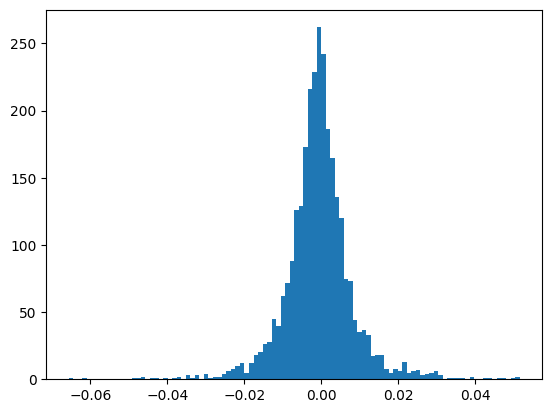

In [111]:
plt.hist(training_responses, bins=100)

#### Detect influential points

I will use Mahalanobis distance, which computes distances from the data's centre and create an oval boundary.

In [112]:
mean_vector = np.mean(training_predictors_df, axis=0)
cov_matrix = np.cov(training_predictors_df, rowvar=False)
inv_cov_matrix = np.linalg.inv(cov_matrix)

In [113]:
mahalanobis_distances = []
for index, row in training_predictors_df.iterrows():
    mahalanobis_distance = scipy.spatial.distance.mahalanobis(row, mean_vector, inv_cov_matrix)
    mahalanobis_distances.append(mahalanobis_distance)

In [114]:
training_predictors_df['mahalanobis_dist'] = mahalanobis_distances
training_predictors_df.head()

,wt,today,tonight,tmwam,dn3sttmwmd,dn1,dn4x1,cftorrrelstd_open_0,liqlog_open_0,llirpnxm_am_1,...,tr_md_1,tr_nt_0,tr_nt_1,tr_nt_12to16,tr_nt_17to21,tr_nt_1to3,tr_nt_4to6,tr_nt_7to11,tr_toxhr_0,mahalanobis_dist
0,0.000594,-0.016720,-0.015436,-0.002487,0.011511,-0.038052,0.025530,0.231635,-0.065247,0.002597,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,10.671336
1,0.001446,0.001475,-0.007683,-0.001346,0.027832,-0.006712,0.029269,-0.482915,1.571073,-0.000055,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,10.792084
2,0.000069,-0.019774,-0.013203,-0.003210,-0.001507,-0.040861,0.005203,0.165615,-2.223915,0.000659,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,12.353677
3,0.000120,-0.000934,-0.002772,-0.000651,0.005818,-0.004393,0.006443,-1.229984,-1.670970,-0.000372,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,12.362570
4,0.000892,0.004249,0.002662,-0.000931,-0.034163,0.007955,-0.037853,-1.326470,0.342333,-0.000857,...,0.0,0.0,0.0,0.0,0.012116,0.0,0.0,-0.055974,0.0,15.332916


In [115]:
#TODO: Need discussion
mahal_threshold = 3 # Typical 'mahal_threshold' is 3
outlier_significance_val = .001

In [116]:
training_predictors_df['mahal_p_value'] = 1 - scipy.stats.chi2.cdf(training_predictors_df['mahalanobis_dist'], mahal_threshold)

In [117]:
outlier_condition = (training_predictors_df['mahal_p_value'] < outlier_significance_val)

In [118]:
nonOutlier_indices = training_predictors_df[~outlier_condition].index

In [119]:
temp_col = 'response'
training_predictors_df[temp_col] = training_responses

training_predictors_df = training_predictors_df[~outlier_condition]

training_responses = training_predictors_df[temp_col]
training_predictors_df.drop(temp_col, axis=COL, inplace=True)

In [120]:
training_predictors_df.drop(['mahalanobis_dist', 'mahal_p_value'], axis = COL, inplace=True)
training_predictors_df.reset_index(drop=True)
training_predictors_df.head()

,wt,today,tonight,tmwam,dn3sttmwmd,dn1,dn4x1,cftorrrelstd_open_0,liqlog_open_0,llirpnxm_am_1,...,tr_lsthrx15_0,tr_md_1,tr_nt_0,tr_nt_1,tr_nt_12to16,tr_nt_17to21,tr_nt_1to3,tr_nt_4to6,tr_nt_7to11,tr_toxhr_0
0,0.000594,-0.016720,-0.015436,-0.002487,0.011511,-0.038052,0.025530,0.231635,-0.065247,0.002597,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
1,0.001446,0.001475,-0.007683,-0.001346,0.027832,-0.006712,0.029269,-0.482915,1.571073,-0.000055,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
2,0.000069,-0.019774,-0.013203,-0.003210,-0.001507,-0.040861,0.005203,0.165615,-2.223915,0.000659,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
3,0.000120,-0.000934,-0.002772,-0.000651,0.005818,-0.004393,0.006443,-1.229984,-1.670970,-0.000372,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
4,0.000892,0.004249,0.002662,-0.000931,-0.034163,0.007955,-0.037853,-1.326470,0.342333,-0.000857,...,0.0,0.0,0.0,0.0,0.0,0.012116,0.0,0.0,-0.055974,0.0


#### Merge features and responses

In [121]:
train_df = pd.concat([training_predictors_df, pd.DataFrame({consts.RESPONSE_NAME: training_responses})], 
                     axis=COL)
test_df = pd.concat([testing_predictors_df, pd.DataFrame({consts.RESPONSE_NAME: testing_responses})], 
                    axis=COL)

### Output

In [122]:
out_path = '../data/cleaned_data/'

In [123]:
out_train_filename = 'training_data.csv'
out_test_filename = 'testing_data.csv'

In [124]:
train_df.to_csv(out_path + out_train_filename, index=False)
test_df.to_csv(out_path + out_test_filename, index=False)

In [125]:
%pip freeze > dependencies.txt

Note: you may need to restart the kernel to use updated packages.
